In [44]:
# The dataset is available at https://www.kaggle.com/datasets/edusanketdk/electronics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv(r'C:\Users\JayaPrakash\Downloads\archive\electronics.csv')
dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [45]:
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [46]:
dataset.shape

(1292954, 10)

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [48]:
from datetime import datetime
pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [49]:
dataset['brand'] = dataset['brand'].astype(str)

In [50]:
dataset['category'] = dataset['category'].astype(str)
dataset['rating'] = dataset['rating'].astype(float)
dataset['user_id'] = dataset['user_id'].astype(str)
dataset['item_id'] = dataset['item_id'].astype(str)

In [51]:
dataset.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


In [52]:
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [53]:
dataset.duplicated().sum()

np.int64(0)

In [54]:
dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64

<Axes: xlabel='rating', ylabel='count'>

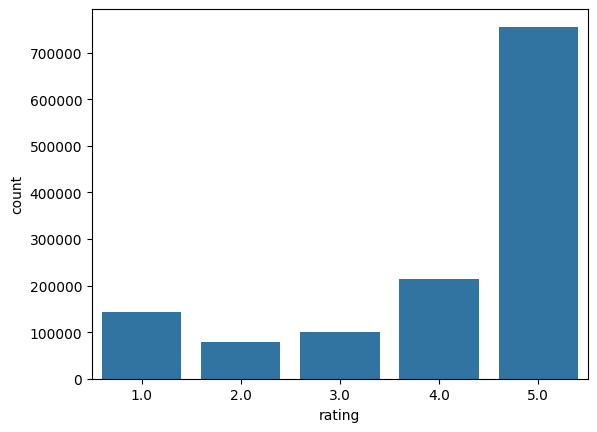

In [55]:
sns.countplot(x='rating', data=dataset)

<Axes: xlabel='year'>

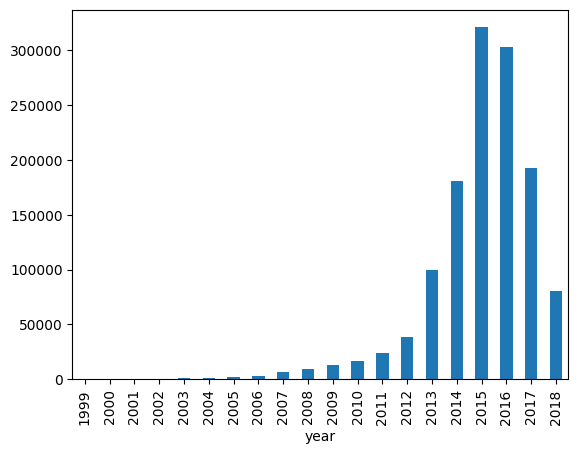

In [56]:
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset.groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

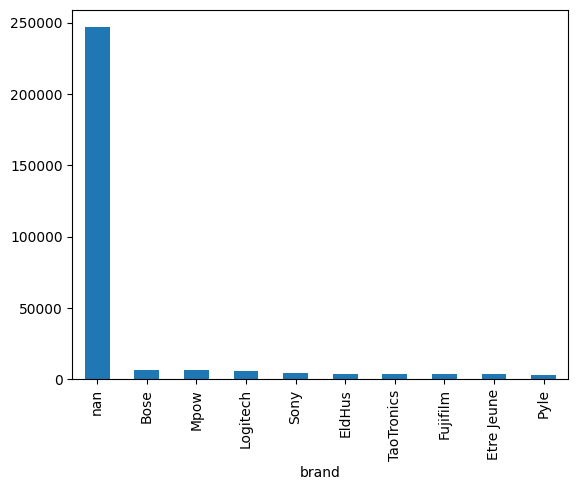

In [57]:
dataset_2015 = dataset[dataset['year'] == 2015]

dataset_2015.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

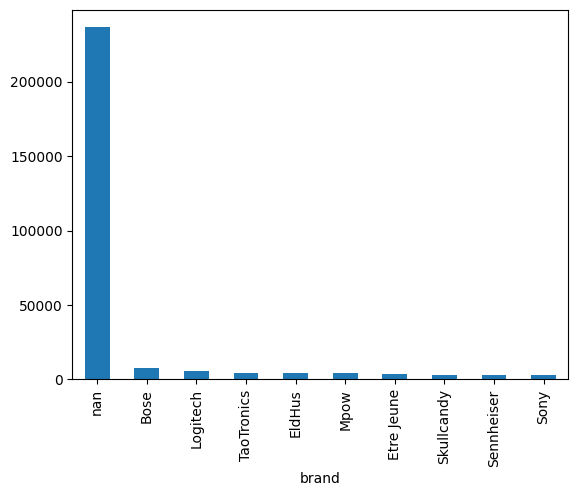

In [58]:
dataset[dataset['year'] == 2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

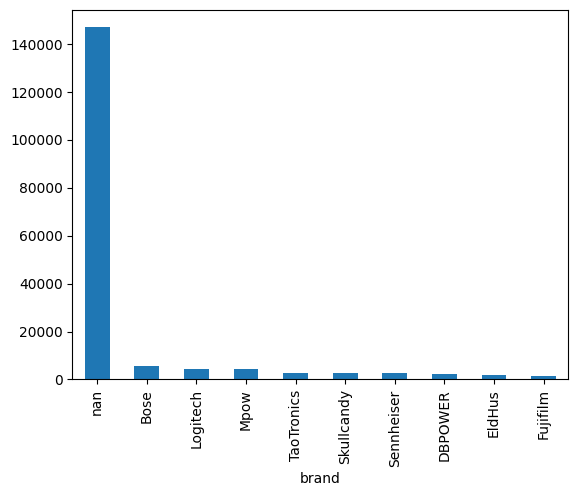

In [59]:
dataset[dataset['year'] == 2017].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

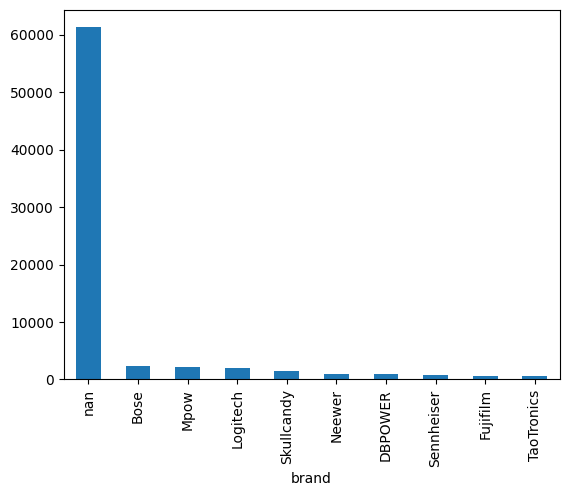

In [60]:
dataset[dataset['year'] == 2018].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='year'>

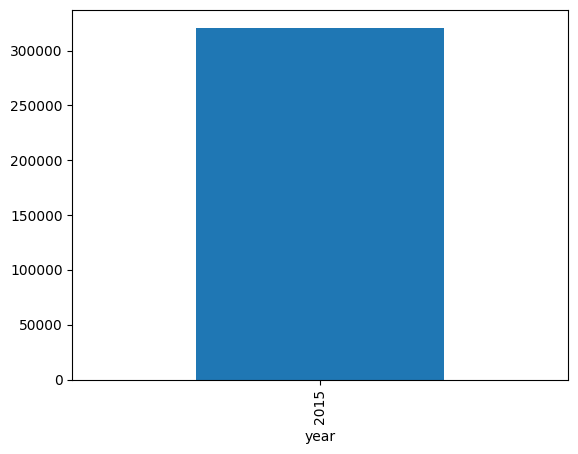

In [61]:
dataset[dataset['year'] == 2015].groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='month'>

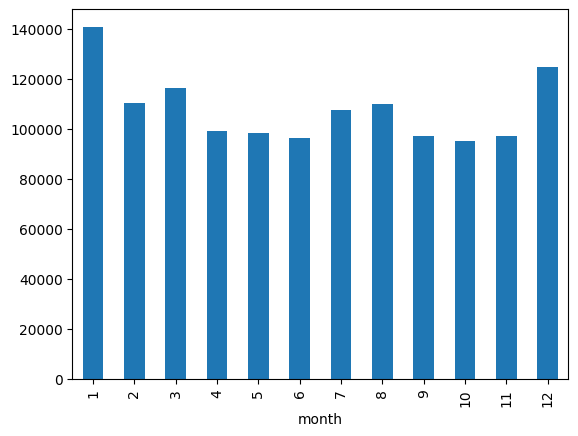

In [62]:
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset.groupby('month')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

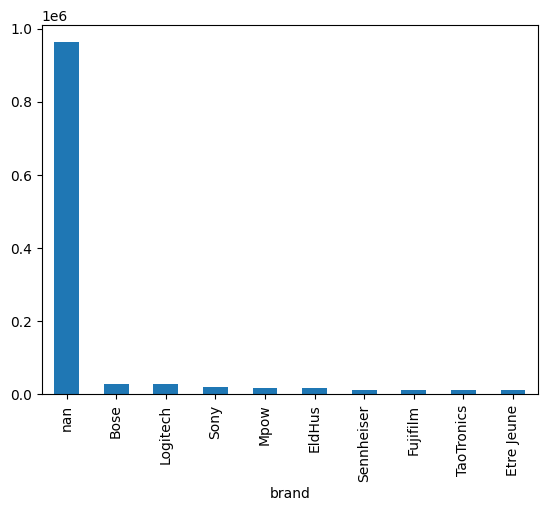

In [63]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='category'>

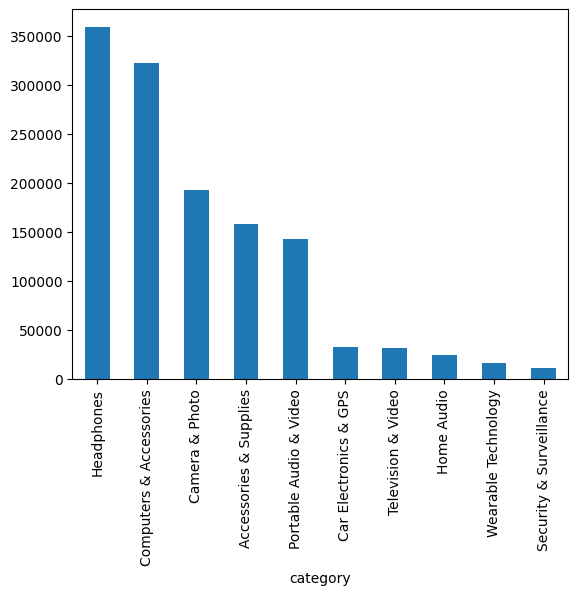

In [64]:
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

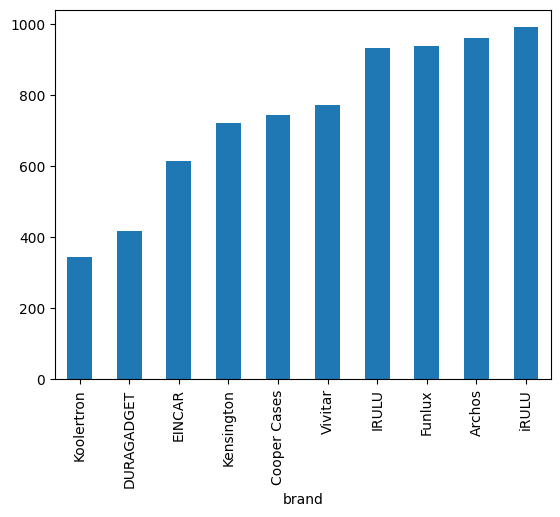

In [65]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: xlabel='category'>

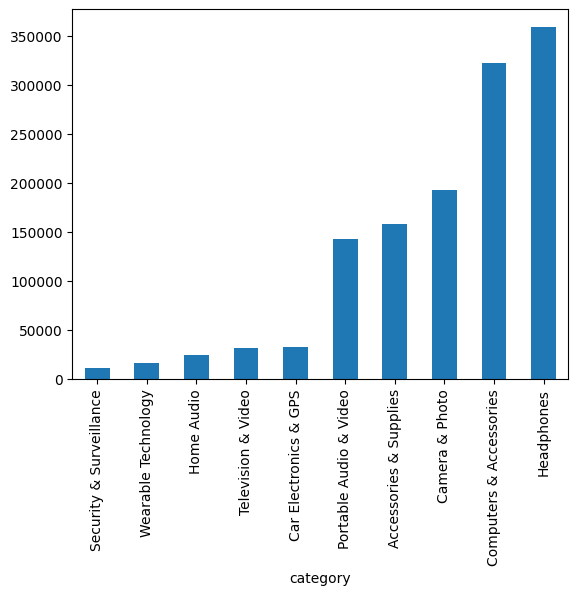

In [66]:
dataset.groupby('category')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: ylabel='rating'>

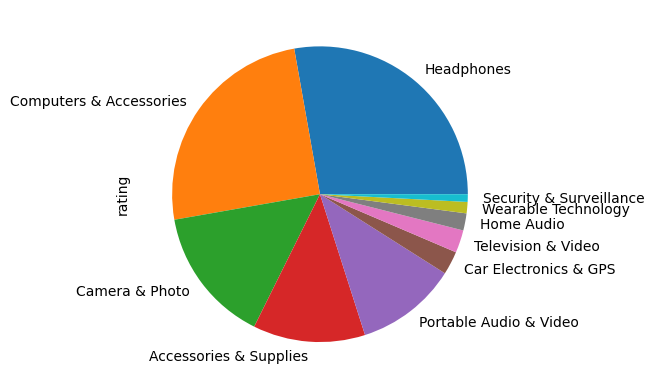

In [67]:
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

<Axes: ylabel='rating'>

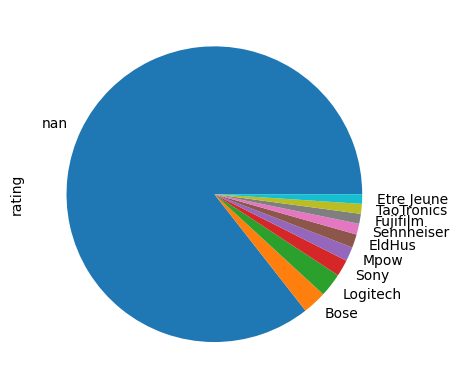

In [68]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')